In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data=pd.read_csv('googleplaystore.csv')

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.shape

(10841, 13)

In [5]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
data.dropna(inplace=True)
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [7]:
def change_size(size):   
    if 'M' in size:    
        x=size[:-1]  
        x=float(x)*1000   
        return x   
    if 'k' in size: 
        x=size[:-1]  
        x=float(x)  
        return x 
    else:   
        return None

In [8]:
data['Size']=data['Size'].apply(change_size)

In [9]:
data['Size']

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10834     2600.0
10836    53000.0
10837     3600.0
10839        NaN
10840    19000.0
Name: Size, Length: 9360, dtype: float64

In [10]:
data.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1637
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [11]:
data['Size'].fillna(method='ffill',inplace=True)

In [12]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [13]:
data['Reviews'] = data['Reviews'].astype('int')

In [14]:
data['Installs'] = data['Installs'].str.replace('+', '')
data['Installs'] = data['Installs'].str.replace(',', '')

In [15]:
data['Installs'] = data['Reviews'].astype('int')

In [16]:
data['Price'] = data['Price'].str.replace('$', '')
data['Price']= data['Price'].astype('float')

In [17]:
data[data['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [18]:
data[data['Rating']<1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [19]:
data[data['Reviews']>data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [20]:
len(data[data['Reviews']>data['Installs']])

0

In [21]:
data.drop(data[data['Reviews'] > data['Installs']].index,inplace=True)

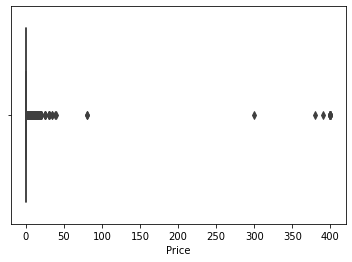

In [22]:
sns.boxplot(x='Price',data=data)
plt.show()

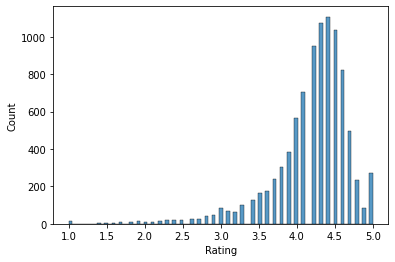

In [23]:
sns.histplot(x='Rating',data=data) 
plt.show()

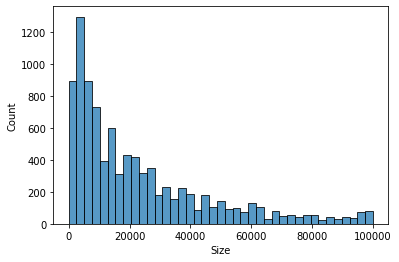

In [24]:
sns.histplot(x='Size',data=data) 
plt.show()

In [29]:
data[data['Price']>200].size

195

In [30]:
data.drop(data[data['Price']>200].index,inplace=True)

In [31]:
data[data['Reviews']>=2000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,3100.0,2914724,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,35000.0,56642847,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,35000.0,69119316,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,17000.0,9642995,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,17000.0,4604324,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,Modern Combat 5: eSports FPS,GAME,4.3,2903386,58000.0,2903386,Free,0.0,Mature 17+,Action,"July 24, 2018",3.2.1c,4.0 and up
9841,Google Earth,TRAVEL_AND_LOCAL,4.3,2339098,63000.0,2339098,Free,0.0,Everyone,Travel & Local,"June 18, 2018",9.2.17.13,4.1 and up
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71000.0,7615646,Free,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.0,2721923,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up


In [32]:
len(data[data['Reviews'] > data['Installs']])

0

In [33]:
data['Installs'].quantile([0.1,0.25,0.50,0.70,0.90,0.95,0.99])

0.10         19.00
0.25        187.00
0.50       5997.00
0.70      48969.20
0.90     591805.20
0.95    1859113.80
0.99    9883046.68
Name: Installs, dtype: float64

In [34]:
data[data['Installs']>100000000.0].count()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [35]:
data.drop(data[data['Installs']>=100000000.0].index,inplace=True)

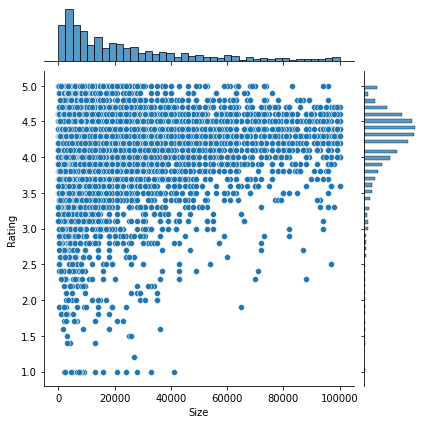

In [36]:
sns.jointplot(y='Rating',x='Size',data=data)
plt.show()

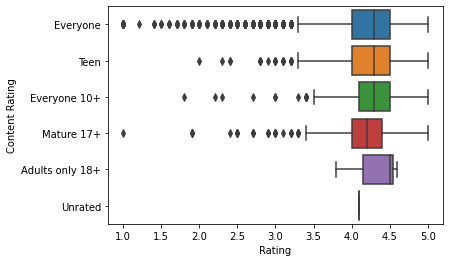

In [37]:
sns.boxplot(x='Rating',y='Content Rating',data=data) 
plt.show()

In [38]:
plt.figure(figsize=(18,12))

<Figure size 1296x864 with 0 Axes>

<Figure size 1296x864 with 0 Axes>

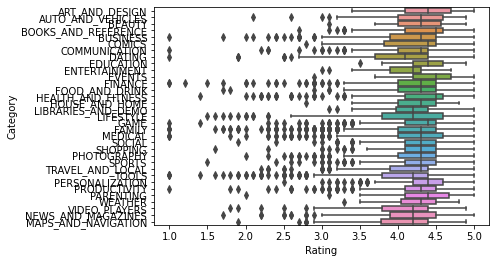

In [39]:
sns.boxplot(x= 'Rating', y= 'Category', data = data)
plt.show()

In [42]:
inp1=data.copy()

In [43]:
inp1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [44]:
inp1['Installs']=inp1['Installs'].apply(np.log1p)

In [45]:
inp1['Reviews']=inp1['Reviews'].apply(np.log1p)

In [46]:
inp1.drop(['App','Last Updated', 'Current Ver','Android Ver'],axis=1,inplace=True)

In [47]:
inp2=pd.get_dummies(inp1)

In [50]:
y=inp2.pop('Rating') 
X=inp2



In [51]:
inp2=pd.get_dummies(inp1)

In [53]:
from sklearn.model_selection import train_test_split 

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
linear_reg=LinearRegression()

In [58]:
linear_reg.fit(X_train,y_train)



LinearRegression()

In [59]:

LinearRegression()


LinearRegression()

In [60]:
y_pred=linear_reg.predict(X_test)

In [61]:
from sklearn.metrics import mean_squared_error 
print("MSE=",mean_squared_error(y_test,y_pred))

MSE= 0.24289817689907933


In [62]:
# print the error
from sklearn.metrics import mean_squared_error
print("RMSE=",np.sqrt(mean_squared_error(y_test,y_pred)))


RMSE= 0.49284701165684197


In [63]:
# print r2 score 
from sklearn.metrics import r2_score
print("R2 score=",r2_score(y_test,y_pred))

R2 score= 0.07677570660363464


In [64]:
# save the model
import joblib
joblib.dump(linear_reg,'Linear_Regression_model.sav')

['Linear_Regression_model.sav']

In [66]:
# load the model
model=joblib.load('Linear_Regression_model.sav')